In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [18]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | caravelas
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | zyryanskoye
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | pantelho
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | nevel
Processing Record 9 of Set 1 | lukovetskiy
Processing Record 10 of Set 1 | igrim
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | mackenzie
Processing Record 22 of Set 1 | yenagoa
Processing Record 23 of Set 1 

Processing Record 40 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | pribelskiy
City not found. Skipping...
Processing Record 43 of Set 4 | vestmannaeyjar
Processing Record 44 of Set 4 | qaanaaq
Processing Record 45 of Set 4 | green river
Processing Record 46 of Set 4 | biak
Processing Record 47 of Set 4 | beroroha
Processing Record 48 of Set 4 | cayenne
Processing Record 49 of Set 4 | lata
Processing Record 50 of Set 4 | yellowknife
Processing Record 1 of Set 5 | vittorio veneto
Processing Record 2 of Set 5 | clyde river
Processing Record 3 of Set 5 | shelburne
Processing Record 4 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 5 | bethel
Processing Record 6 of Set 5 | tumut
Processing Record 7 of Set 5 | anloga
Processing Record 8 of Set 5 | hearst
Processing Record 9 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 5 | kavieng
Processing Record 11 of

Processing Record 28 of Set 8 | derzhavinsk
Processing Record 29 of Set 8 | chifeng
Processing Record 30 of Set 8 | verkhnevilyuysk
Processing Record 31 of Set 8 | bahia blanca
Processing Record 32 of Set 8 | council bluffs
Processing Record 33 of Set 8 | sangar
Processing Record 34 of Set 8 | sept-iles
Processing Record 35 of Set 8 | longyearbyen
Processing Record 36 of Set 8 | maragogi
Processing Record 37 of Set 8 | brumado
Processing Record 38 of Set 8 | zyryanka
Processing Record 39 of Set 8 | karratha
Processing Record 40 of Set 8 | angra
City not found. Skipping...
Processing Record 41 of Set 8 | moron
Processing Record 42 of Set 8 | amalapuram
Processing Record 43 of Set 8 | dhidhdhoo
Processing Record 44 of Set 8 | banon
Processing Record 45 of Set 8 | banjar
Processing Record 46 of Set 8 | la carolina
Processing Record 47 of Set 8 | te anau
Processing Record 48 of Set 8 | buin
Processing Record 49 of Set 8 | lindi
Processing Record 50 of Set 8 | cabo rojo
Processing Record 1 

Processing Record 15 of Set 12 | dunedin
Processing Record 16 of Set 12 | bilibino
Processing Record 17 of Set 12 | nara
Processing Record 18 of Set 12 | komsomolskiy
Processing Record 19 of Set 12 | navahrudak
Processing Record 20 of Set 12 | motygino
Processing Record 21 of Set 12 | zlotow
Processing Record 22 of Set 12 | iqaluit
Processing Record 23 of Set 12 | bida
Processing Record 24 of Set 12 | monte alegre
Processing Record 25 of Set 12 | kunming
Processing Record 26 of Set 12 | broken hill
Processing Record 27 of Set 12 | praxedis guerrero
Processing Record 28 of Set 12 | oussouye
Processing Record 29 of Set 12 | abha
Processing Record 30 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 31 of Set 12 | karpogory
Processing Record 32 of Set 12 | correntina
Processing Record 33 of Set 12 | port lincoln
Processing Record 34 of Set 12 | galveston
Processing Record 35 of Set 12 | koumac
Processing Record 36 of Set 12 | iwanai
Processing Record 37 of Set 12 | dharch

In [23]:
len(city_data)

576

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Caravelas,-17.7125,-39.2481,72.03,94,100,4.70,BR,2021-12-07 10:38:34
1,Sao Filipe,14.8961,-24.4956,78.19,65,95,6.31,CV,2021-12-07 10:38:35
2,Zyryanskoye,56.8306,86.6258,26.13,93,100,9.78,RU,2021-12-07 10:38:35
3,Punta Arenas,-53.1500,-70.9167,44.71,65,75,25.32,CL,2021-12-07 10:37:33
4,Bredasdorp,-34.5322,20.0403,74.52,46,40,9.22,ZA,2021-12-07 10:40:10
5,Pantelho,16.9333,-92.5500,55.36,77,5,2.37,MX,2021-12-07 10:38:37
6,Rikitea,-23.1203,-134.9692,74.75,82,83,19.10,PF,2021-12-07 10:40:11
7,Nevel,56.0209,29.9284,19.26,91,91,6.42,RU,2021-12-07 10:40:12
8,Lukovetskiy,64.2956,41.9211,1.38,99,48,3.38,RU,2021-12-07 10:38:38
9,Igrim,63.1906,64.4162,9.01,91,100,5.66,RU,2021-12-07 10:40:12


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]

In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

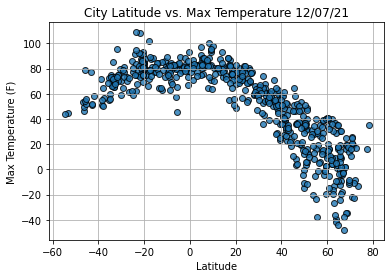

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

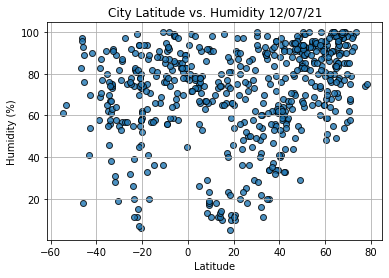

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

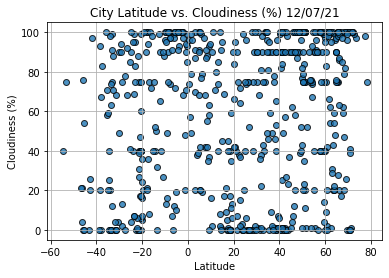

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

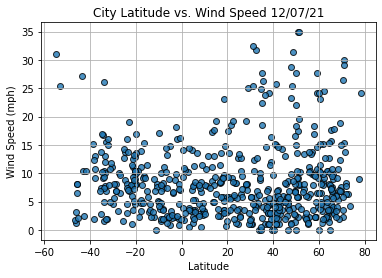

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()